**Anabela Pereira - A87990** <br>
**André Gonçalves - A87942**

# Problema 2

In [3]:
from z3 import *
import matplotlib.pyplot as plt
from timeit import timeit

## "Pigeon Hole Principle"
`Existem N pombos e N-1 poleiros de pombos. Cada pombo ocupa totalmente um poleiro. Pretende-se alocar cada pombo a  um poleiro próprio.`

    a.i.)
Nesta alínea é nos pedido para provar através de **lógica proposicional** que "*pigeon hole principle*" não tem solução, para isso apresentamos as seguintes condições para resolvermos o problema.
   
**Condições**

1. Todos os pombos têm um poleiro
$$
\bigwedge_{i=0}^{N} \bigvee_{j=0}^{N-1} p[i][j]
$$
2. Nenhum poleiro tem 2 (ou mais) pombos
$$
\neg \quad ( \quad \bigvee_{j = 0}^{N-1} \bigvee_{i = 0}^{N-1} \bigvee_{k = i+1}^{N} ( p[i][j]  \wedge  p[k][j] )\quad ) 
$$

A função *prova_logica_proposicional* recebe um N(número de pombos) e guarda num dicionário, inicialmente vazio, todos os valores possíveis das combinações (i,j), sendo usado posteriormente pelo **Z3** para criar as regras de lógica. 

In [2]:
def prova_logica_proposicional (N):
    s = Solver()
    
    p={}
    # O pombo i está no poleiro j
    for i in range(N):
        p[i]={}
        for j in range(N-1):
            p[i][j]=Bool(str(i)+','+str(j))
    
    # Todos os pombos têm um poleiro
    s.add(And([Or([p[i][j] for j in range(N-1)]) for i in range(N)]))
    
    # Nenhum poleiro tem 2 (ou mais) pombos
    s.add(Not(Or([Or([Or([And(p[i][j],p[k][j]) for k in range(i+1,N)]) for i in range(N-1)]) for j in range(N-1)])))
    
    return s.check()==sat

prova_logica_proposicional(11)

False

    a.ii.)
Nesta alínea, diferente da anterior, é nos pedido para provarmos em **lógica inteira linear** que o problema apresentado não tem solução.

**Condições**

1. Cada pombo está num só poleiro
$$
\forall_i \cdot \quad (\sum_{j=0}^{N-1} p[i,j] \quad ) = 1
$$
2. Cada poleiro só tem um pombo
$$
 \forall_j \cdot \quad (\sum_{i=0}^{N} p[i,j] \quad) = 1
$$

A função *prova_logica_inteira* recebe um N(número de pombos) e testa se está alocado apenas um pombo a cada poleiro.

In [3]:
def prova_logica_inteira (N):
    s=Solver()
    
    p={}
    # O pombo i está no poleiro j
    for i in range(N):
        for j in range(N-1):
            p[i,j]=Int(str(i)+','+str(j))
    
    # Cada pombo está num só poleiro
    for i in range(N):
        s.add(Sum([ p[i,j] for j in range(N-1)])==1)
    
    # Cada poleiro só tem um pombo
    for j in range(N-1):
        s.add(Sum([ p[i,j] for i in range(N)])==1)
        
    return s.check()==sat

prova_logica_inteira (100)

False

    b.)
Nesta alínea é nos pedido para analisarmos a complexidade das funções em função de N de forma empírica.

In [4]:
from timeit import timeit

Max = 11
N_pombos = 1
while (N_pombos < Max):
    print("Número de pombos:",N_pombos)
    
    # LP = Lógica Proposicional 
    print("LP:",timeit(setup="from __main__ import prova_logica_proposicional,N_pombos",\
           stmt="prova_logica_proposicional(N_pombos)",number=3)/3)

    # LLI = Lógica Linear Inteira
    print("LLI:",timeit(setup="from __main__ import prova_logica_inteira,N_pombos",\
           stmt="prova_logica_inteira(N_pombos)",number=3)/3)
    
    print("\n")
    
    N_pombos += 1

Número de pombos: 1
LP: 0.04610707666665803
LLI: 0.04434451966668954


Número de pombos: 2
LP: 0.027354755666692654
LLI: 0.021401764999988398


Número de pombos: 3
LP: 0.03407056933330447
LLI: 0.03504469999999552


Número de pombos: 4
LP: 0.035864415666613546
LLI: 0.040126055666632965


Número de pombos: 5
LP: 0.04622619833336709
LLI: 0.026184544666648435


Número de pombos: 6
LP: 0.05728696266669431
LLI: 0.032325317333288694


Número de pombos: 7
LP: 0.07824739099995288
LLI: 0.03160527566660676


Número de pombos: 8
LP: 0.12422898933330846
LLI: 0.036002489999949226


Número de pombos: 9
LP: 0.7804515926666227
LLI: 0.09424787999993593


Número de pombos: 10
LP: 1.7867578046666495
LLI: 0.04472313966668177




Gráfico do tempo de execução da **Lógica Proposicional**

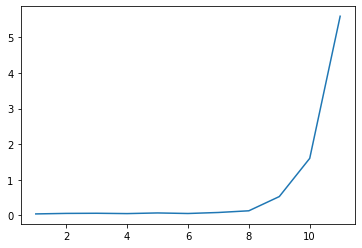

In [5]:
plt.plot(range(1, 12), [timeit(setup="from __main__ import prova_logica_proposicional", \
       stmt=f"prova_logica_proposicional({x})", number = 1) for x in range(1, 12)])
plt.show()

Gráfico do tempo de execução da **Lógica Linear Inteira**

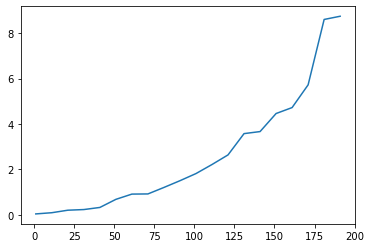

In [6]:
plt.plot(range(1, 200,10), [timeit(setup="from __main__ import prova_logica_inteira", \
       stmt=f"prova_logica_inteira({x})", number = 1) for x in range(1, 200,10)])
plt.show()